# Trajectory Analysis

One of the applications of SC RNA-Seq is the ability to understand how cells evolve in their transcriptional landscape over time, basically this is a trajectory of the transcription over time.

Trajectory analysis tries to order single cells along a continuous path that represents a biological process such as differentiation, activation, or response to stimulus. It does not give absolute time. Instead it gives pseudotime, a relative ordering that puts “earlier” cells at one end and “later” cells at the other.

Use trajectory analysis when:
- You expect a continuous process (development, differentiation, activation).
- Cells are sampled from different stages of that process, not just random unrelated cell types.
- Do not use it when the population is a mix of distinct unrelated cell types with no transitional states.

In our case study, we are working with Fetal Liver hematopoietic stem cell that has the potential to differentiate into different types of blood cells

### Install Packages!

In [ ]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified
!pip install louvain
!pip install scvelo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 100.2 MB/s eta 0:00:00
  Attempting uninstall: igraph
    Found existing installation: igraph 1.0.0
    Uninstalling igraph-1.0.0:
      Successfully uninstalled

### Load Data

In [ ]:
#Import core single cell datasets

import scanpy as sc
import anndata as ad
import numpy as np
#import scvelo as scv

In [ ]:
!mkdir -p GSM5115832
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Fbarcodes.tsv.gz -O /content/GSM5115832/barcodes.tsv.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Ffeatures.tsv.gz -O /content/GSM5115832/features.tsv.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Fmatrix.mtx.gz -O /content/GSM5115832/matrix.mtx.gz

--2025-10-29 05:37:58--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Fbarcodes.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61513 (60K) [application/x-gzip]
Saving to: ‘/content/GSM5115832/barcodes.tsv.gz’

/content/GSM5115832 100%[===================>]  60.07K  --.-KB/s    in 0.1s    

2025-10-29 05:37:59 (488 KB/s) - ‘/content/GSM5115832/barcodes.tsv.gz’ saved [61513/61513]

--2025-10-29 05:37:59--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Ffeatures.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP re

🚧 Note that this is another way to import data obtained from 10x.

In [ ]:
esc_adata = sc.read_10x_mtx('/content/GSM5115832/')
esc_adata.var_names_make_unique()

### QC

In [ ]:
esc_adata.shape

(12289, 31053)

In [ ]:
esc_adata.var.head()

,gene_ids,feature_types
Xkr4,ENSMUSG00000051951,Gene Expression
Gm1992,ENSMUSG00000089699,Gene Expression
Gm37381,ENSMUSG00000102343,Gene Expression
Rp1,ENSMUSG00000025900,Gene Expression
Sox17,ENSMUSG00000025902,Gene Expression


In [ ]:
esc_adata.var['MT'] = esc_adata.var_names.str.startswith("MT-")
esc_adata.var['RIBO'] = esc_adata.var_names.str.startswith("RPS", "RPL")
esc_adata.var['HB'] = esc_adata.var_names.str.startswith("^HB[^(P)]")

In [ ]:
sc.pp.calculate_qc_metrics(
    esc_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5,4)  # Adjust figure size
plt.rcParams["axes.grid"] = True  # Add grid to plots
plt.rcParams["axes.edgecolor"] = "black" # Set plot border color
plt.rcParams["axes.linewidth"] = 1.5 # Set plot border width
plt.rcParams["axes.facecolor"] = "white" # Set background color
plt.rcParams["axes.labelcolor"] = "black" # Set label color
plt.rcParams["xtick.color"] = "black" # Set x-axis tick color
plt.rcParams["ytick.color"] = "black" # Set y-axis tick color
plt.rcParams["text.color"] = "black" # Set text color

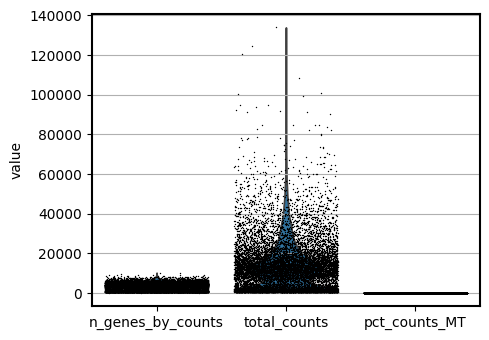

In [ ]:
sc.pl.violin(
    esc_adata,
    ["n_genes_by_counts", 'total_counts', 'pct_counts_MT'],
    jitter=0.4,
    multi_panel=False,
)

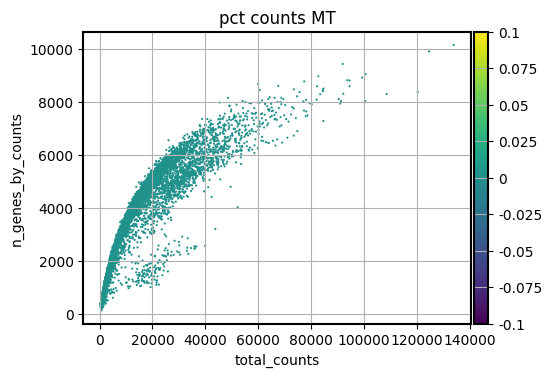

In [ ]:
sc.pl.scatter(esc_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

In [ ]:
#sc.pp.scrublet(esc_adata)

In [ ]:
#Normalisation
esc_adata.layers["counts"] = esc_adata.X.copy()
sc.pp.normalize_total(esc_adata)
sc.pp.log1p(esc_adata)

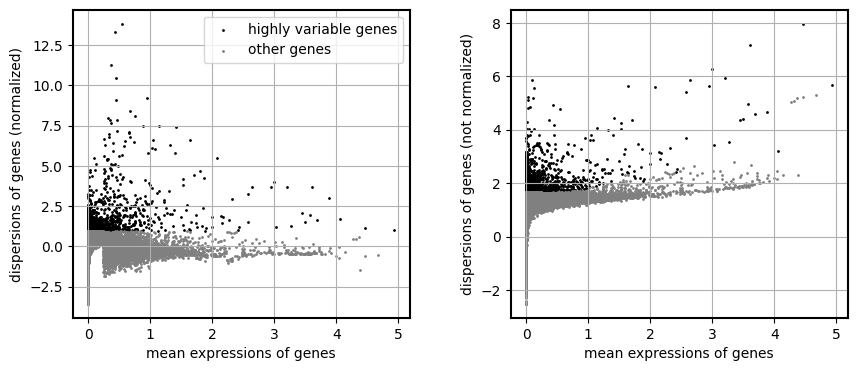

In [ ]:
#Feature selection
sc.pp.highly_variable_genes(esc_adata, n_top_genes=2500)
sc.pl.highly_variable_genes(esc_adata)

### Dimensionality Reduction

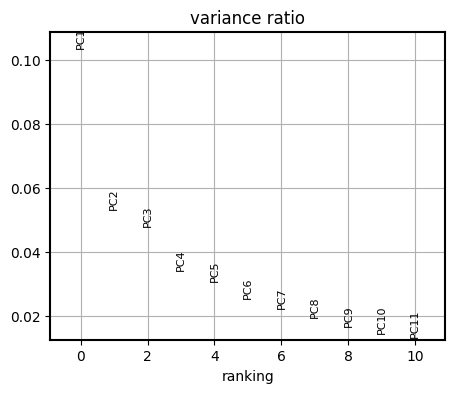

In [ ]:
#Dim Reduction
sc.tl.pca(esc_adata)
sc.pl.pca_variance_ratio(esc_adata, n_pcs=10, log=False)


In [ ]:
il_genes = [gene for gene in esc_adata.var_names[esc_adata.var['highly_variable']] if gene.lower().startswith('il')]
print(il_genes)

['Il1b', 'Il2rg', 'Il13ra2', 'Il7', 'Il12a', 'Il6ra', 'Il17re', 'Il11', 'Il4i1', 'Il15', 'Il2rb', 'Il33']


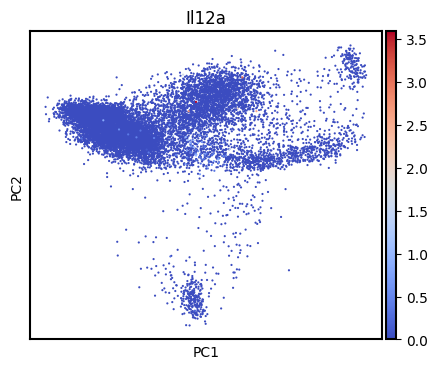

In [ ]:
sc.pl.pca(esc_adata, color="Il12a", cmap="coolwarm")

### UMAP

In [ ]:
sc.pp.neighbors(esc_adata)
sc.tl.umap(esc_adata)

In [ ]:
esc_adata

AnnData object with n_obs × n_vars = 12289 × 31053
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB', 'log1p_total_counts_HB', 'pct_counts_HB'
    var: 'gene_ids', 'feature_types', 'MT', 'RIBO', 'HB', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

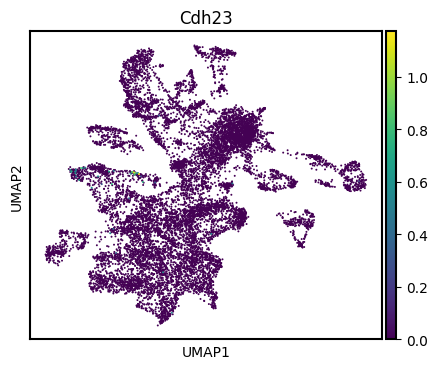

In [ ]:
sc.pl.umap(
    esc_adata,
    color=["Cdh23"],
    size=8,
)

In [ ]:
sc.tl.leiden(esc_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.25)

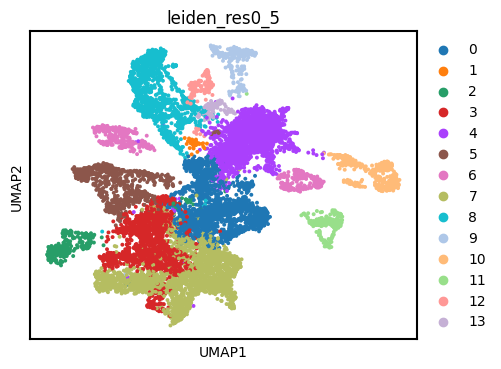

In [ ]:
sc.pl.umap(
    esc_adata,
    color=["leiden_res0_5"],
    size=32,
)

### Cell Type Annotation

In [ ]:
import decoupler as dc

In [ ]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="mouse")

# Keep canonical cell type markers alone
markers = markers[markers["mouse"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
0,Hepatocytes,A1cf
1,Bergmann glia,A2m
2,Bergmann glia,Mug2
3,Bergmann glia,Mug1
4,Mast cells,A4galt


In [ ]:
esc_adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

In [ ]:
dc.mt.ulm(data=esc_adata,
          net=markers,
          tmin = 3)

In [ ]:
score = dc.pp.get_obsm(esc_adata, key="score_ulm")

In [ ]:
esc_adata.obsm["score_ulm"].head(1)

,Acinar cells,Adipocyte progenitor cells,Adipocytes,Adrenergic neurons,Airway epithelial cells,Airway goblet cells,Airway smooth muscle cells,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,...,Thymocytes,Transient cells,Trichocytes,Trigeminal neurons,Trophoblast cells,Trophoblast progenitor cells,Tuft cells,Undefined placental cells,Urothelial cells,Vascular smooth muscle cells
AAACCCACACAAAGCG-1,-0.750407,-0.551503,-0.617239,4.809056,-0.246552,-0.59146,-0.246552,-0.836877,-0.640888,-0.652663,...,-0.537526,0.929286,-0.27566,-0.827713,-0.616667,-0.213516,0.53178,-0.427116,-0.444567,-0.301977


In [ ]:
esc_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocyte progenitor cells', 'Adipocytes',
       'Adrenergic neurons', 'Airway epithelial cells', 'Airway goblet cells',
       'Airway smooth muscle cells', 'Alpha cells', 'Alveolar macrophages',
       'Anterior pituitary gland cells',
       ...
       'Thymocytes', 'Transient cells', 'Trichocytes', 'Trigeminal neurons',
       'Trophoblast cells', 'Trophoblast progenitor cells', 'Tuft cells',
       'Undefined placental cells', 'Urothelial cells',
       'Vascular smooth muscle cells'],
      dtype='object', length=174)

In [ ]:
#rank genes
esc_adata_gene_rank = dc.tl.rankby_group(score, groupby="leiden_res0_5", reference="rest", method="t-test_overestim_var")
esc_adata_gene_rank = esc_adata_gene_rank[esc_adata_gene_rank["stat"] > 0]
esc_adata_gene_rank.head(5)

,group,reference,name,stat,meanchange,pval,padj
1,0,rest,Mesothelial cells,26.504235,0.709973,9.229752e-143,8.029885e-141
2,0,rest,Adipocyte progenitor cells,24.804045,0.869295,1.722461e-126,9.990271e-125
3,0,rest,Kidney progenitor cells,24.229891,0.580452,3.560492e-121,1.548814e-119
4,0,rest,Crypt cells,23.759255,0.484602,2.922803e-116,1.017135e-114
5,0,rest,Radial glia cells,23.309538,0.515700,1.445739e-112,4.192644e-111


In [ ]:
top_cell_type_per_group = esc_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group.to_dict())

{('0', 1): 'Mesothelial cells',
 ('1', 2262): 'Pluripotent stem cells',
 ('10', 1218): 'Hepatoblasts',
 ('11', 1392): 'Endothelial cells',
 ('12', 1740): 'Megakaryocytes',
 ('13', 1914): 'Dendritic cells',
 ('2', 2088): 'Anterior pituitary gland cells',
 ('3', 348): 'Gamma delta T cells',
 ('4', 174): 'T cells naive',
 ('5', 1566): 'Sertoli cells',
 ('6', 523): 'Glomus cells',
 ('7', 696): 'Fibroblasts',
 ('8', 870): 'Erythroblasts',
 ('9', 1044): 'Erythroid-like and erythroid precursor cells'}

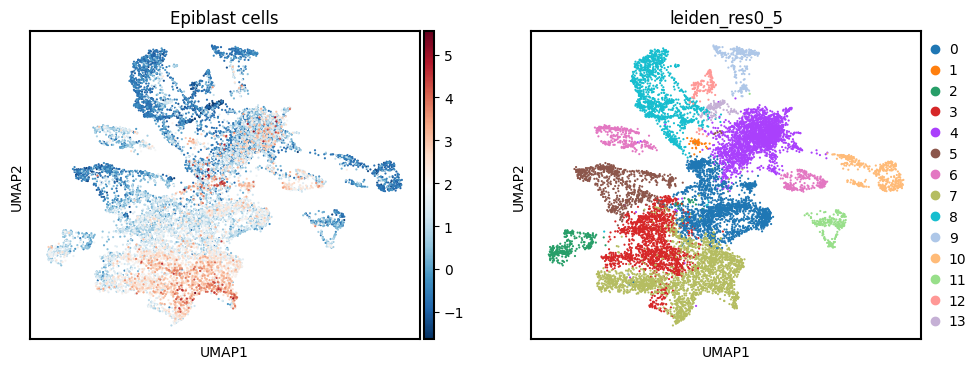

In [ ]:
sc.pl.umap(score, color=["Hepatoblasts","leiden_res0_5"], cmap="RdBu_r")

In [ ]:
dict_ann = esc_adata_gene_rank[esc_adata_gene_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
dict_ann

{'0': 'Mesothelial cells',
 '4': 'T cells naive',
 '3': 'Gamma delta T cells',
 '6': 'Glomus cells',
 '7': 'Fibroblasts',
 '8': 'Erythroblasts',
 '9': 'Erythroid-like and erythroid precursor cells',
 '10': 'Hepatoblasts',
 '11': 'Endothelial cells',
 '5': 'Sertoli cells',
 '12': 'Megakaryocytes',
 '13': 'Dendritic cells',
 '2': 'Anterior pituitary gland cells',
 '1': 'Pluripotent stem cells'}

In [ ]:
esc_adata.obs["leiden_res0_5"] = esc_adata.obs["leiden_res0_5"].cat.rename_categories(dict_ann)

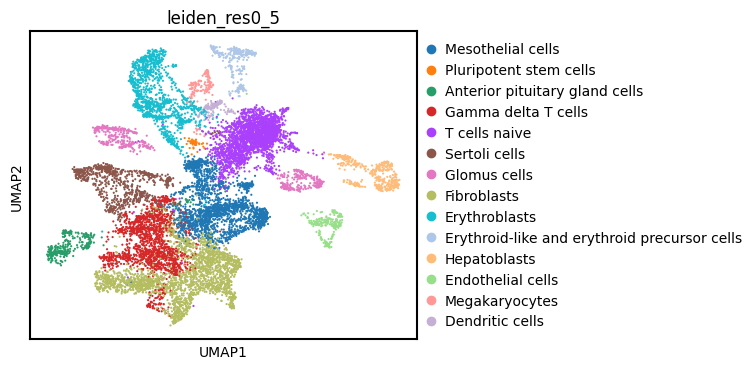

In [ ]:
sc.pl.umap(
    adata=esc_adata,
    color=[ "leiden_res0_5"],
    ncols=1,
)

### Trajectory Inference
It is an attempt to understand how cells transition from one type to another (like stem → mature)?

#### First, we will build a graph?

Think of a **graph** as a network:

- Each **cell** is a **dot (node)**.
- If two cells are similar, draw a **line (edge)** between them.

So the graph connects cells that look alike.

In [ ]:
#Trajectory analysis
sc.tl.draw_graph(esc_adata)

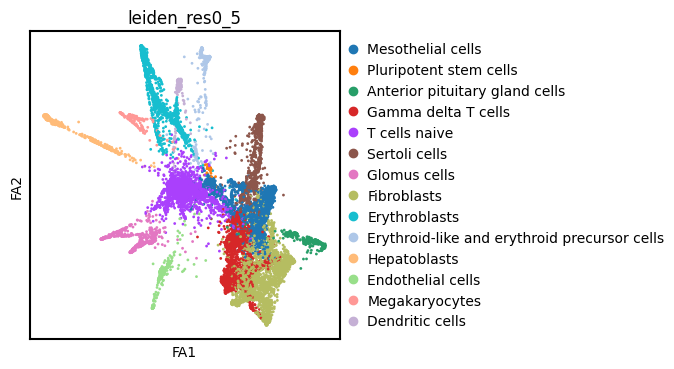

In [ ]:
plt.rcParams["figure.figsize"] = (4,4)
sc.pl.draw_graph(esc_adata, color='leiden_res0_5', size = 16)

#### Then we will ABSTRACT the graph

Basically, all the points that cluster to make one cell type, will be converted to one point. More like a blunt summary of everypoint

In [ ]:
sc.tl.paga(esc_adata, groups='leiden_res0_5')


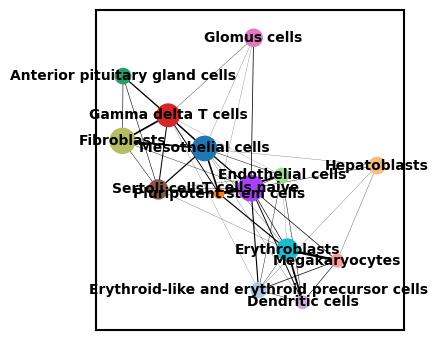

In [ ]:
sc.pl.paga(esc_adata, color=['leiden_res0_5'])

In [ ]:
sc.tl.draw_graph(esc_adata, init_pos='paga')

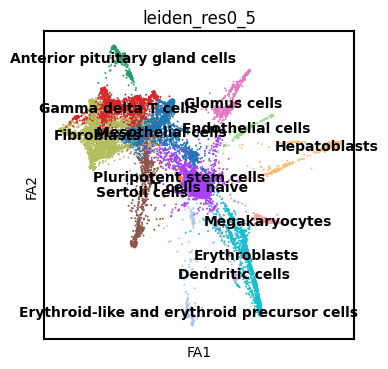

In [ ]:
sc.pl.draw_graph(esc_adata, color='leiden_res0_5', legend_loc='on data', size=8)

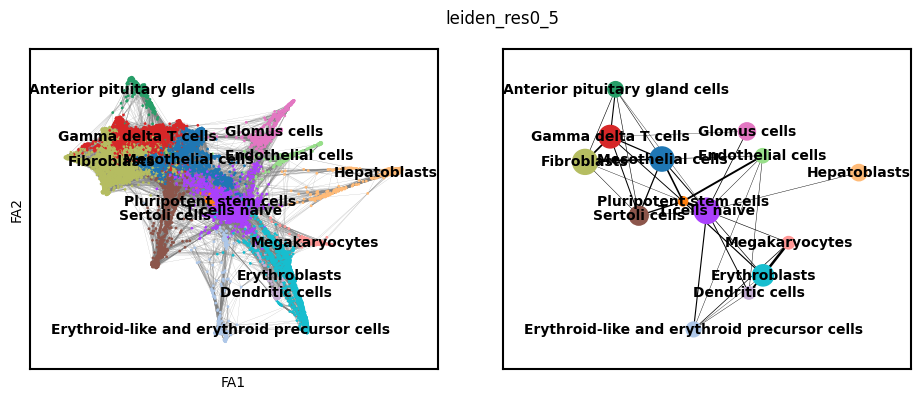

[<Axes: xlabel='FA1', ylabel='FA2'>, <Axes: >]

In [ ]:
plt.rcParams["figure.figsize"] = (5,4)
sc.pl.paga_compare(esc_adata, threshold=0.03, frameon=True, edges=True, size = 16)

#### Now how do cells transition from one type to another, assuming we have a pluripotent progenitor cell.

In [ ]:
esc_adata.uns['iroot'] = np.flatnonzero(esc_adata.obs['leiden_res0_5']  == 'Pluripotent stem cells')[0]
sc.tl.dpt(esc_adata)

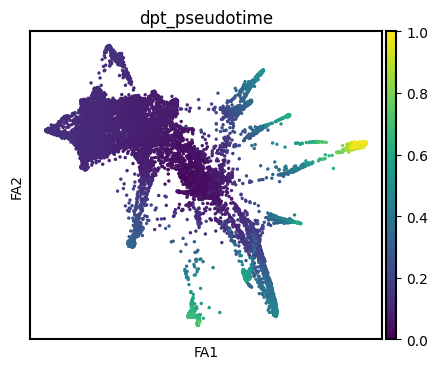

In [ ]:
sc.pl.draw_graph(esc_adata, color=['dpt_pseudotime', 'leiden_res0_5'], legend_loc='on data', size = 24)

In [ ]:
esc_adata.write("esc_adata.h5", compression="gzip")